# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Aziz Fathony
- Email: aziz.fathony22@gmail.com
- Id Dicoding: Muhammad Aziz Fathony

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 Bagaimana jumlah penyewa sepeda berdasarakan musim dan pada musim apa tingkat penyewaan tertinggi
- pertanyaan 2 Bagaimana tren harian penyewa sepeda
- pertanyaan 3 Apa yang mempengaruhi tingkat penyewaan sepeda

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Azfat/proyek-akhir-analisis-data/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Azfat/proyek-akhir-analisis-data/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#Mengecek kondisi data day_df

In [4]:
day_df.info()
"""sepertinya dateday tipe datanya salah, seharusnya datetime bukan object"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


'sepertinya dateday tipe datanya salah, seharusnya datetime bukan object'

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("jumlah duplikasi:", day_df.duplicated().sum())

jumlah duplikasi: 0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#Mengecek kondisi data hour_df

In [8]:
hour_df.info()
"""masih hal yang sama datetime bentuk datanya object bukan datetime"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


'masih hal yang sama datetime bentuk datanya object bukan datetime'

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("jumlah duplikasi:", hour_df.duplicated().sum())

jumlah duplikasi: 0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### merubah kode season menjadi musim sebenarnya

In [12]:
print(day_df['season'].unique())

[1 2 3 4]


In [13]:
musim_dict = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
day_df['season'] = day_df['season'].map(musim_dict)

In [14]:
musim_dict = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
hour_df['season'] = hour_df['season'].map(musim_dict)

#### merubah workingday menjadi working dan holiday

In [15]:
harikerja_dict = {
    0: "holiday",
    1: "work"
}
day_df['workingday'] = day_df['workingday'].map(harikerja_dict)

### Cleaning Data

mengubah tipe data column dteday dari object menjadi date time pada day_df

In [16]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

mengubah tipe data column dteday dari object menjadi date time pada hour_df

In [17]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

## Exploratory Data Analysis (EDA)

### Explore day_df

#### mencari banyaknya pengguna berdasarkan musim

In [18]:
day_df.groupby(by="season").agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum"
    
})

,instant,casual,registered
season,,,
fall,188,226091,835038
springer,181,60622,410726
summer,184,203522,715067
winter,178,129782,711831


#### Melihat musim dengan peminjaman sepeda terbanyak

In [19]:
day_df.groupby(by=["season", "yr"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

#musim dengan peminjaman sepeda terbanyak pada musim fall dan paling sedikit pada musim winter

instant  casual  registered     cnt
season   yr                                     
fall     1        94  130641      510838  641479
summer   1        92  125958      445315  571273
winter   1        89   76969      438507  515476
fall     0        94   95450      324200  419650
summer   0        92   77564      269752  347316
winter   0        89   52813      273324  326137
springer 1        91   39197      282151  321348
         0        90   21425      128575  150000

#### Melihat bulan dengan peminjaman sepeda terbanyak

In [20]:
day_df.groupby(by=["mnth", "yr"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,,instant,casual,registered,cnt
mnth,yr,,,,
9,1,30,43778,174795,218573
8,1,31,43197,171306,214503
7,1,31,41705,161902,203607
6,1,30,43294,159536,202830
10,1,31,34538,164303,198841
5,1,31,44235,151630,195865
4,1,30,38456,135768,174224
3,1,31,31618,133257,164875
11,1,30,21009,131655,152664


#### Mengelompokan berdasarkan hari

In [21]:
day_df.groupby(by=["weekday", "yr"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,,instant,casual,registered,cnt
weekday,yr,,,,
4,1,52,39020,271823,310843
5,1,52,48785,256999,305784
3,1,52,36659,267220,303879
6,1,52,94305,203759,298064
2,1,52,33854,254917,288771
1,1,53,39224,236058,275282
0,1,53,80918,186035,266953
5,0,52,29453,152553,182006
2,0,52,23989,156349,180338


#### Melihat peminjaman paling banyak di hari weekday atau weekend

In [22]:
day_df.groupby(by=["season", "yr", "workingday"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)
# penyewa paling banyak pada hari kerja

,,,instant,casual,registered,cnt
season,yr,workingday,,,,
fall,1,work,65,70151,385213,455364
summer,1,work,64,60362,333185,393547
winter,1,work,61,35834,323556,359390
fall,0,work,66,48595,245114,293709
summer,0,work,64,37467,199599,237066
springer,1,work,60,18584,209261,227845
winter,0,work,60,22654,197015,219669
fall,1,holiday,29,60490,125625,186115
summer,1,holiday,28,65596,112130,177726


#### Groub berdasarkan cuaca terhadap peminjaman sepeda

In [23]:
day_df.groupby(by=["season", "yr", "weathersit"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

instant  casual  registered     cnt
season   yr weathersit                                     
fall     1  1                70   96457      393836  490293
summer   1  1                61   95447      311216  406663
winter   1  1                51   52148      261280  313428
fall     0  1                66   71488      237662  309150
summer   0  1                52   50941      169382  220323
springer 1  1                55   25022      187479  212501
winter   0  1                52   38303      167756  206059
         1  2                36   24504      172883  197387
summer   1  2                30   30391      133192  163583
fall     1  2                23   32920      113807  146727
summer   0  2                38   26323       98190  124513
springer 1  2                34   13974       92263  106237
winter   0  2                29   13372       91751  105123
fall     0  2                25   23487       80465  103952
springer 0  1                56   16540       82995   99535
            2                32    4805       44531   49336
winter   0  3                 8    1138       13817   14955
fall     0  3                 3     475        6073    6548
winter   1  3                 2     317        4344    4661
fall     1  3                 1    1264        3195    4459
springer 1  3                 2     201        2409    2610
summer   0  3                 2     300        2180    2480
springer 0  3                 2      80        1049    1129
summer   1  3                 1     120         907    1027

### Explore hour_df

#### groub melihat by hour melihat di jam berapa penyewaan tertinggi

In [24]:
hour_df.groupby(by=["hr", "yr"]).agg({
    "instant": "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,,instant,casual,registered,cnt
hr,yr,,,,
17,1,365,32747,176481,209228
18,1,365,26430,166357,192787
8,1,364,8792,156742,165534
16,1,365,33095,109031,142126
19,1,365,20980,120007,140987
17,0,365,21473,106159,127632
18,0,363,18066,98919,116985
13,1,365,32561,83019,115580
12,1,364,30712,84504,115216


#### buat kategori penyewaan berdasarkan jam dini hari, pagi, siang, sore, malam

In [25]:
def klasifikasi_waktu (angka):
    if 0 <= angka < 5:
        return "Dini Hari"
    elif 5 <= angka < 11:
        return "Pagi"
    elif 11 <= angka < 15:
        return "Siang"
    elif 15 <= angka < 18:
        return "Sore"
    elif 18 <= angka <= 23:
        return "Malam"
    else:
        return "Waktu tidak valid"


In [26]:
hour_df["waktu"] = hour_df.hr.apply(klasifikasi_waktu)
hour_df.groupby(by="waktu").instant.nunique()

waktu
Dini Hari    3559
Malam        4368
Pagi         4350
Siang        2913
Sore         2189
Name: instant, dtype: int64

#### group berdasarkan waktu yang telah dibuat

In [27]:
hour_df.groupby(by=["waktu", "yr"]).agg({
    "instant": "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,,instant,casual,registered,cnt
waktu,yr,,,,
Malam,1,2190,89794,519042,608836
Pagi,1,2184,49603,435305,484908
Sore,1,1095,99585,366328,465913
Siang,1,1458,123969,310719,434688
Malam,0,2178,64420,312853,377273
Pagi,0,2166,34471,250881,285352
Sore,0,1094,63075,218769,281844
Siang,0,1455,76837,184780,261617
Dini Hari,1,1807,9814,45417,55231


#### peminjam sepeda terbanyak berdasarkan musim, waktu peminjaman

In [28]:
hour_df.groupby(by=["season", "waktu"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

instant  casual  registered     cnt
season   waktu                                         
fall     Malam         1122   65418      276349  341767
summer   Malam         1104   52375      229600  281975
fall     Pagi          1126   31807      211622  243429
         Sore           564   54403      176896  231299
winter   Malam         1062   24928      206350  231278
fall     Siang          752   67194      145299  212493
summer   Sore           552   53738      156943  210681
         Pagi          1103   27297      179430  206727
winter   Pagi          1056   17438      186570  204008
         Sore           531   36566      160414  196980
summer   Siang          736   64440      130322  194762
winter   Siang          706   47092      138472  185564
springer Malam         1080   11493      119596  131089
         Pagi          1065    7532      108564  116096
         Sore           542   17953       90844  108797
         Siang          719   22080       81406  103486
fall     Dini Hari      932    7269       24872   32141
summer   Dini Hari      914    5672       18772   24444
winter   Dini Hari      877    3758       20025   23783
springer Dini Hari      836    1564       10316   11880

#### tingkat peminjaman sepeda berdasarkan waktu dan kondisi cuaca

#### klasifikasi berdasarkan hujan atau tidaknya

In [29]:
def hujan_tidak (angka):
    if angka in (1,2):
        return "Tidak hujan"
    elif angka in (3, 4):
        return "Hujan"

In [30]:
hour_df["status_cuaca"] = hour_df["weathersit"].apply(hujan_tidak)

In [31]:
hour_df.groupby(by=["weathersit", "waktu"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

instant  casual  registered     cnt
weathersit waktu                                         
1          Malam         3043  120068      622222  742290
           Sore          1502  123944      434490  558434
           Siang         1827  148562      340013  488575
           Pagi          2672   56895      426899  483794
2          Pagi          1339   24801      225245  250046
           Malam          949   27891      165095  192986
           Siang          865   46113      135858  181971
           Sore           475   31307      116357  147664
1          Dini Hari     2369   13276       51804   65080
3          Malam          375    6249       44420   50669
           Sore           211    7408       34215   41623
           Pagi           339    2378       34042   36420
           Siang          221    6131       19628   25759
2          Dini Hari      916    4369       18916   23285
3          Dini Hari      273     617        3243    3860
4          Malam            1       6         158     164
           Sore             1       1          35      36
           Dini Hari        1       1          22      23

In [32]:
hour_df.groupby(by=["status_cuaca", "waktu"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

instant  casual  registered     cnt
status_cuaca waktu                                         
Tidak hujan  Malam         3992  147959      787317  935276
             Pagi          4011   81696      652144  733840
             Sore          1977  155251      550847  706098
             Siang         2692  194675      475871  670546
             Dini Hari     3285   17645       70720   88365
Hujan        Malam          376    6255       44578   50833
             Sore           212    7409       34250   41659
             Pagi           339    2378       34042   36420
             Siang          221    6131       19628   25759
             Dini Hari      274     618        3265    3883

#### Tingkat peminjaman sepeda berdasarkan waktu dan hari kerja atau libur

In [33]:
hour_df.groupby(by=["workingday", "waktu"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

instant  casual  registered     cnt
workingday waktu                                         
1          Malam         2988   89842      659017  748859
           Pagi          2975   47400      583446  630846
           Sore          1496   75589      433062  508651
           Siang         1989   83246      285281  368527
0          Siang          924  117560      210218  327778
           Sore           693   87071      152035  239106
           Malam         1380   64372      172878  237250
           Pagi          1375   36674      102740  139414
           Dini Hari     1142   11055       45666   56721
1          Dini Hari     2417    7208       28319   35527

In [34]:
hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
fall        760
summer      721
winter      690
springer    482
Name: cnt, dtype: int64

#### Tingkat peneyewaan sepeda berdsarkan suhu dalam celsius

In [35]:
hour_df.groupby(by=["temp"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,instant,casual,registered,cnt
temp,,,,
0.70,690,37087,140211,177298
0.72,570,39157,124292,163449
0.74,516,38393,123194,161587
0.66,693,32786,123418,156204
0.64,692,32758,122227,154985
0.60,675,29442,120463,149905
0.62,726,29609,118576,148185
0.76,396,32675,102985,135660
0.56,579,23913,99843,123756


#### Tingkat peminjaman sepeda berdasarkan suhu yang dirasa

In [36]:
hour_df.groupby(by=["atemp"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,instant,casual,registered,cnt
atemp,,,,
0.6212,988,74160,237299,311459
0.6515,497,39302,123695,162997
0.6667,593,31882,123852,155734
0.6061,588,25146,104004,129150
0.6970,443,30285,97323,127608
...,...,...,...,...
0.9545,1,20,95,115
0.0303,8,5,106,111
1.0000,1,24,77,101


#### Tingkat penyewaan sepeda berdasarkan tingkat kelembapan

In [37]:
hour_df.groupby(by=["hum"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,instant,casual,registered,cnt
hum,,,,
0.83,630,13720,79545,93265
0.55,352,19317,66889,86206
0.46,316,16576,62677,79253
0.66,388,15821,61099,76920
0.62,325,15164,60961,76125
...,...,...,...,...
0.08,1,16,61,77
0.97,1,18,46,64
0.14,2,10,28,38


#### Tingkat penyewaan sepeda berdasarkan kecepatan angin

In [38]:
hour_df.groupby(by=["windspeed"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,instant,casual,registered,cnt
windspeed,,,,
0.0000,2180,63338,286865,350203
0.1642,1695,60747,272251,332998
0.1940,1657,62291,270116,332407
0.2239,1513,62478,258200,320678
0.1343,1738,55177,251246,306423
0.2537,1295,56097,220783,276880
0.1045,1617,45800,223021,268821
0.2836,1048,47009,178873,225882
0.0896,1425,37033,176771,213804


Korelasi antara masing masing variabel

## Visualisasi data

### Pertanyaan 1: Bagaimana pengaruh musim terhadap tingkat penyewaan sepeda?

In [39]:
data_tahun_pertama = day_df[day_df["yr"] == 0]

In [40]:
data_tahun_kedua = day_df[day_df["yr"] == 1]

In [41]:
sum_cnt_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
sum_cnt_df.head(5)

,season,cnt
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\1887652137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\1887652137.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


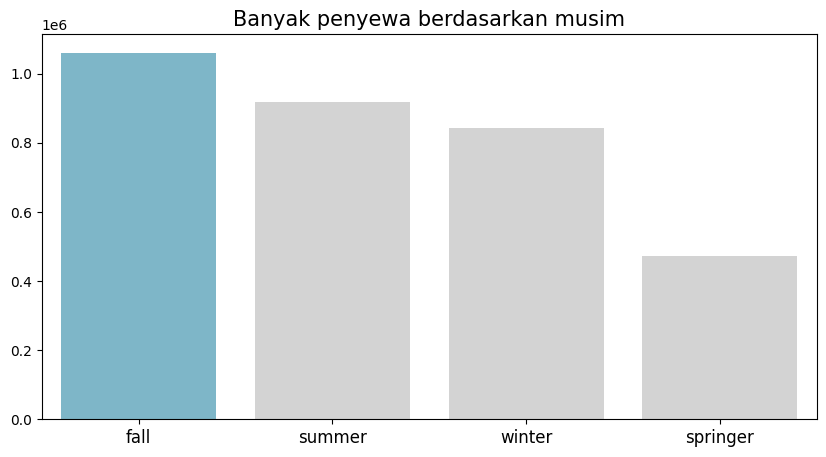

In [42]:

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="cnt", 
    x="season",
    data=sum_cnt_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Banyak penyewa berdasarkan musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [43]:
by_yr_hr_df = hour_df.groupby(by=["season", "yr"]).cnt.sum().reset_index()
print(by_yr_hr_df)
   

     season  yr     cnt
0      fall   0  419650
1      fall   1  641479
2  springer   0  150000
3  springer   1  321348
4    summer   0  347316
5    summer   1  571273
6    winter   0  326137
7    winter   1  515476


C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\563153152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = by_yr_hr_df[by_yr_hr_df["yr"] == 0].sort_values(by="cnt", ascending=False), x="season", y="cnt", palette=colors, ax=ax[0])
C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\563153152.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data = by_yr_hr_df[by_yr_hr_df["yr"] == 0].sort_values(by="cnt", ascending=False), x="season", y="cnt", palette=colors, ax=ax[0])
C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\563153152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = by_yr_hr_df[by_yr_hr_df["yr"] == 1]

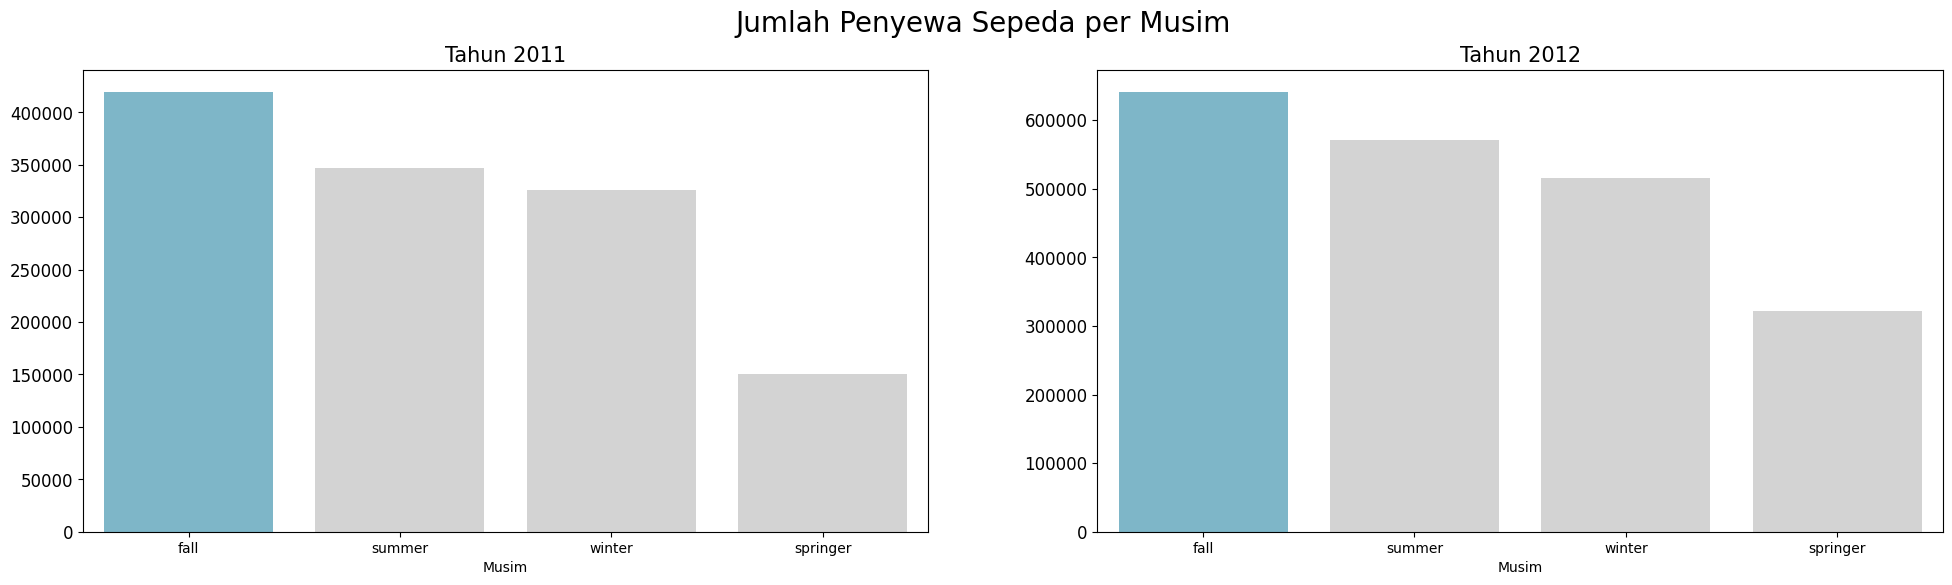

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Barplot pertama untuk tahun 2011
sns.barplot(data = by_yr_hr_df[by_yr_hr_df["yr"] == 0].sort_values(by="cnt", ascending=False), x="season", y="cnt", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Musim")
ax[0].set_title("Tahun 2011", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Barplot kedua untuk tahun 2012
sns.barplot(data = by_yr_hr_df[by_yr_hr_df["yr"] == 1].sort_values(by="cnt", ascending=False), x="season", y="cnt", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Musim")
ax[1].set_title("Tahun 2012", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Jumlah Penyewa Sepeda per Musim", fontsize=20)
plt.show()

### Pertanyaan 2: Pengaruh kondisi cuaca terhadap tingkat penyewaan sepeda

In [45]:
sum_cnt_cuaca_df = hour_df.groupby(by="status_cuaca").cnt.sum().sort_values(ascending=False).reset_index()
sum_cnt_cuaca_df.head(5)

,status_cuaca,cnt
0,Tidak hujan,3134125
1,Hujan,158554


C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\2149103278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\azizf\AppData\Local\Temp\ipykernel_6212\2149103278.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


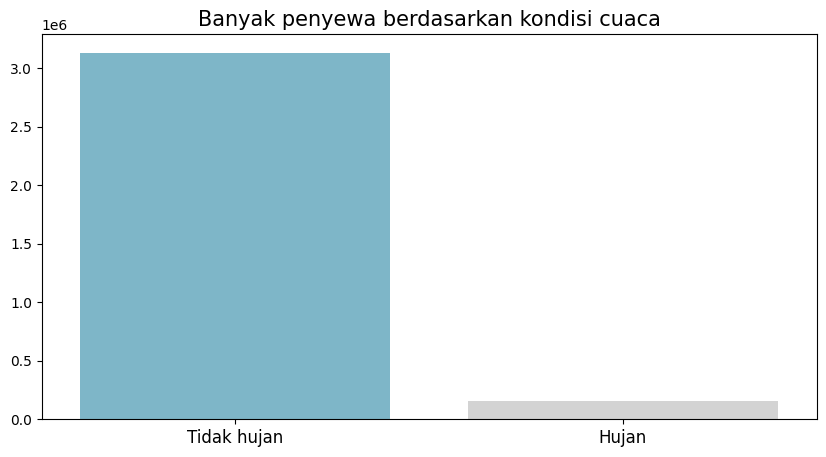

In [46]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="cnt", 
    x="status_cuaca",
    data=sum_cnt_cuaca_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Banyak penyewa berdasarkan kondisi cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana tren penyewaan sepeda bulanan?

In [47]:
sum_cnt_hr_df = hour_df.groupby(by="waktu").cnt.sum().reset_index()
sum_cnt_hr_df.head(5)

,waktu,cnt
0,Dini Hari,92248
1,Malam,986109
2,Pagi,770260
3,Siang,696305
4,Sore,747757


In [48]:
correlation_day_cnt = day_df['dteday'].corr(day_df['cnt'])
print("Korelasi antara 'day' dan 'cnt':", correlation_day_cnt)

Korelasi antara 'day' dan 'cnt': 0.6288302722083062


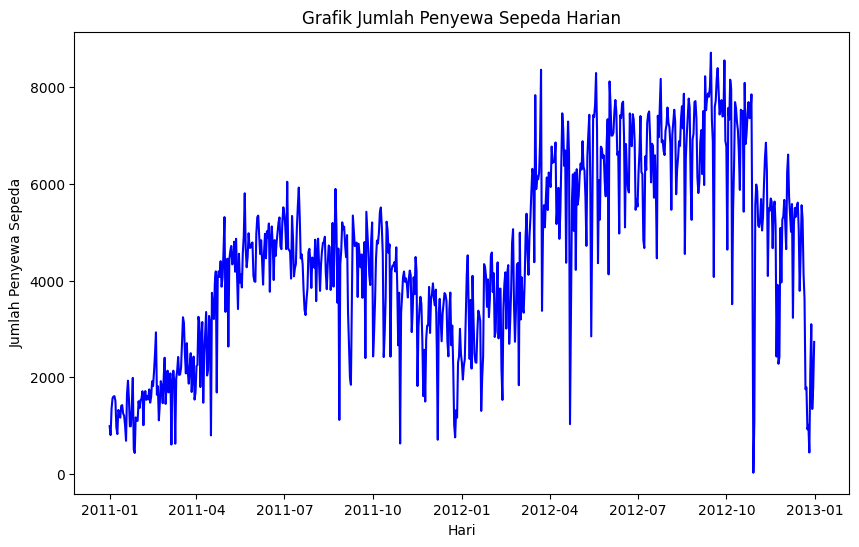

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(day_df['dteday'], day_df['cnt'], linestyle='-', color='b')
plt.title("Grafik Jumlah Penyewa Sepeda Harian")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.grid(False)

plt.show()

## Pertanyaan

### Pertanyaan 4: Bagaimana pengaruh suhu, suhu perasaan, kelembapan dan kecepatan angin terhadap tingkat peminjaman sepeda

#### korelasi antara suhu dengan banyak penyewa sepeda

In [50]:
by_temp_df = day_df.groupby(by="cnt").temp.nunique().sort_values(ascending=True).reset_index()
print(by_temp_df)

      cnt  temp
0      22     1
1    5225     1
2    5255     1
3    5259     1
4    5267     1
..    ...   ...
691  5202     2
692  4649     2
693  3974     2
694  6591     2
695  6883     2

[696 rows x 2 columns]


In [51]:
correlation_temp_cnt = day_df['temp'].corr(day_df['cnt'])
print("Korelasi antara 'temp' dan 'cnt':", correlation_temp_cnt)

Korelasi antara 'temp' dan 'cnt': 0.6274940090334918


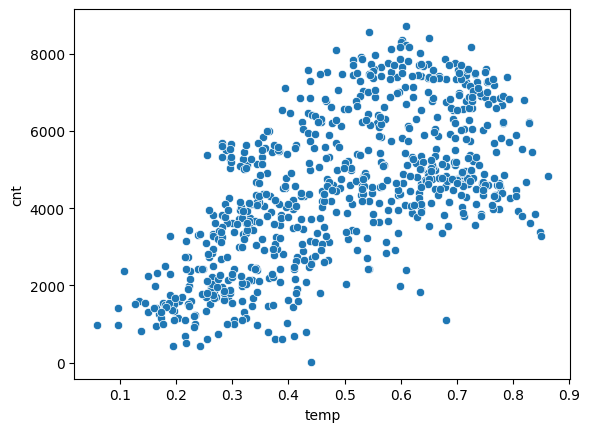

In [52]:
sns.scatterplot(data=day_df, x="temp", y="cnt")
plt.show()

<Axes: xlabel='temp', ylabel='cnt'>

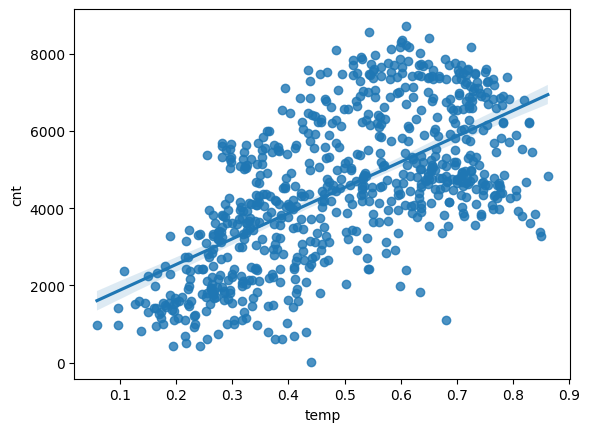

In [53]:
sns.regplot(data= day_df, x= "temp", y="cnt")

#### korelasi antara suhu yang dirasa dengan banyak penyewa sepeda

In [54]:
by_atemp_df = hour_df.groupby(by="atemp").cnt.sum().reset_index()
print(by_atemp_df)

     atemp   cnt
0   0.0000    39
1   0.0152    13
2   0.0303   111
3   0.0455   294
4   0.0606   686
..     ...   ...
60  0.9091  1540
61  0.9242  1281
62  0.9545   115
63  0.9848   256
64  1.0000   101

[65 rows x 2 columns]


In [55]:
correlation_atemp_cnt = day_df['atemp'].corr(day_df['cnt'])
print("Korelasi antara 'atemp' dan 'cnt':", correlation_atemp_cnt)

Korelasi antara 'atemp' dan 'cnt': 0.6310656998491814


<Axes: xlabel='atemp', ylabel='cnt'>

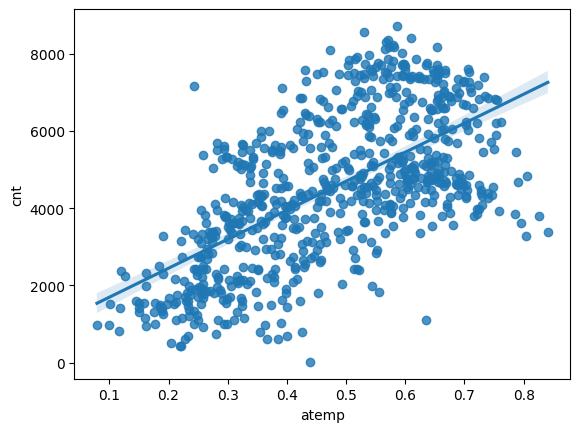

In [56]:
sns.regplot(data= day_df, x= "atemp", y="cnt")

#### korelasi antara kelembapan udara dengan banyak penyewa sepeda

In [57]:
by_hum_df = hour_df.groupby(by="hum").cnt.sum().reset_index()

In [58]:
correlation_hum_cnt = day_df['hum'].corr(day_df['cnt'])
print("Korelasi antara 'hum' dan 'cnt':", correlation_hum_cnt)

Korelasi antara 'hum' dan 'cnt': -0.10065856213715522


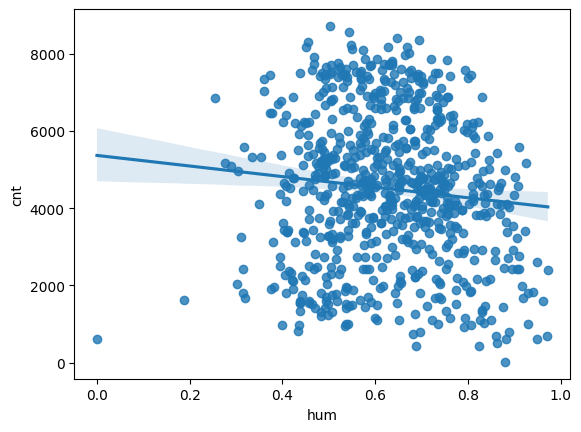

In [59]:
sns.regplot(data=day_df, x="hum", y="cnt")
plt.show()

#### korelasi antara kecepatan angin dengan banyaknya penyewa sepeda

In [60]:
by_windspeed_df = hour_df.groupby(by="windspeed").cnt.sum().reset_index()

In [61]:
correlation_windspeed_cnt = day_df['windspeed'].corr(day_df['cnt'])
print("Korelasi antara 'windspeed' dan 'cnt':", correlation_windspeed_cnt)

Korelasi antara 'windspeed' dan 'cnt': -0.23454499742167004


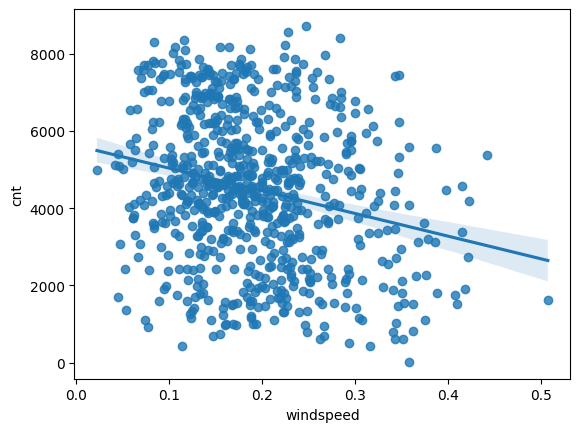

In [62]:
sns.regplot(data=day_df, x="windspeed", y="cnt")
plt.show()

## Conclusion

- Conclution pertanyaan 1: bahwa tingkat peminjaman sepeda tertinggi pada musim gugur, dan terendah pada musim semi
- conclution pertanyaan 2: bahwa kondisi cuaca saat bersalju atau hujan baik ringan dan berat akan mempengaruhi jumlah peminjam sepeda menjadi lebih rendah dibandingkan saat cuaca cerah
- conclution pertanyaan 3: Tingkat peminjaman sepeda dilihat melalui tren mengalami naik turun sesuai dengan musim yang sedang berlangsung, dapat dilihat lagi bahwa data tahun kedua diperoleh lebih banyak penyewa sepeda
- conclution 4: suhu dan suhu yang dirasa memiliki nilai korelasi positif diamana semakin meningkat suhu diiringin dengan meningkatnya jumlah penyewa sepeda, kelemabapan udara dan kecepatan angin memiliki korelasi negatif terhadap tingkat penyewa sepeda dimana semakin tinggi nilainya maka tingkat penyewa sepede cenderung mengelami penurunan

In [63]:
hour_df.to_csv("all_data.csv", index=False)

In [64]:
day_df.to_csv("day_data.csv", index=False)